# Assignment 3

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import constants

plt.rcParams.update({"font.size":16, "axes.labelsize":16, "font.family":"sans-serif", 
                     "font.sans-serif":"Arial"})

<ol>
    <li>Recall the velocity addition example from class: Frank is on a space station, Mary is in a spacecraft moving away from the space station in the +x direction, and she is firing a proton gun at asteroids that are in the spacecraft's path.
        <ol>
            <li>Assume the protons leave the proton gun with speed 0.99c in the +x direction. Plot the proton speed measured by <em>Frank</em> as a function of spacecraft speed relative to the space station.</li>
            <li>Now suppose the protons leave the gun in a "cone" shape rather than straight along the +x axis, so that their velocity vectors have y and z components. The angle of the proton code is $15^{\circ}$, and their launch speed is still 0.99c. Plot Frank's measurement of the y-component of the proton velocity at the edge of the cone, as a function of spacecraft speed.</li>
        </ol>
    </li>
</ol>

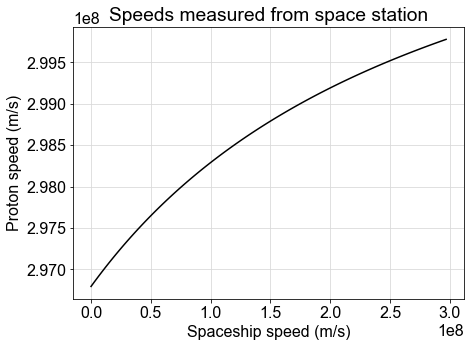

In [2]:
# Velocity addition formula: u = (u' + v) / ((1 + (v/c^2))u')
proton_fired_speed = 0.99 * constants.c
proton_measured_speed = lambda v: (proton_fired_speed + v) / (1 + (v*proton_fired_speed/constants.c**2))
spaceship_speed = np.linspace(0, 0.99*constants.c, num=100, endpoint=True)

plt.figure(figsize=(7,5))
plt.plot(spaceship_speed, proton_measured_speed(spaceship_speed), color='k')
plt.xlabel('Spaceship speed (m/s)')
plt.ylabel('Proton speed (m/s)')
plt.title('Speeds measured from space station')
plt.grid(color='0.85')

<ol start=2>
    <li>Make a 2-d plot of spacetime with $x$ on the horizontal axis and $ct$ on the vertical axis.
    <ol>
        <li>Imagine two flashbulbs positioned in the Earth's approximate rest frame with locations $x = 0$ km and $x = 300000$ km (slightly less than the moon's distance from Earth). Both bulbs flash at $t = 0$. Represent the flashes with points on your spacetime plot. Put in world lines representing travel of the light from each flash.</li>
        <li>Suppose the James Webb Space Telescope is at rest at $x = 150000$ km. Mark it on the plot with the symbol of your choice, then plot its world line.</li>
        <li>Aliens are sending a reconnaissance microprobe through the solar system at high speed. At $t = 0$, the probe is lurking at $x = 500000$ km. In the (approximate) rest frame of observers on Earth, the microprobe moves at speed $0.1c$ in the -x direction. Mark the probe's position at $t = 0$ and plot its world line.</li>
        </ol></li>
</ol>

Based only on your plot, would you say the flashes were simultaneous the point of view of the James Webb Space Telescope? What about from the point of view of the microprobe?

Text(0, 0.5, 'ct (kilometers)')

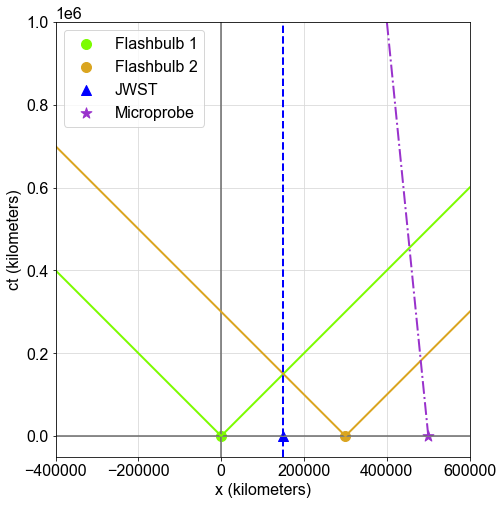

In [6]:
bulb1_x = [0] # These are 1-element arrays, which will scatterplot easily
bulb2_x = [300000]
JWST_x = [150000]
microprobe_x = [500000]
teq0 = [0] # All points start at t = 0

# Function to plot the worldlines of light traveling from an event at (x, t=0)
# length = worldline length on plot
def plot_light_worldlines(x, length, color='k'):
    xlen = length * np.cos(np.pi / 4) # 45 degrees = pi/4
    ylen = length * np.sin(np.pi / 4)
    plt.plot([x-xlen, x, x+xlen], [ylen, 0, ylen], color=color, lw=2)

# Make big figure so we can see all the markers
plt.figure(figsize=(8,8))

# Put lines on the plot to represent x=0 and ct=0
plt.axvline(0, color='dimgray') # Draws a vertical line
plt.axhline(0, color='dimgray') # Draws a horizontal line

# Set default worldline length: 500000 km is the largest distance given in this problem,
#   so I use something bigger to create our worldlines
wl_length = 1.5e6

# Plot the flashbulbs at t=0 and the light worldlines they create
bulb_colors = ['lawngreen', 'goldenrod']
for i, b in enumerate([bulb1_x, bulb2_x]):
    plt.scatter(b, teq0, label='Flashbulb '+f"{i+1}", color=bulb_colors[i], s=100)
    plot_light_worldlines(b, wl_length, color=bulb_colors[i])
    
# Plot the JWST initial position and worldline
plt.scatter(JWST_x, teq0, label='JWST', color='b', s=100, marker='^')
plt.axvline(JWST_x, color='b', ls='--', lw=2)

# Plot the microprobe
plt.scatter(microprobe_x, teq0, label='Microprobe', s=130, 
            marker='*', color='darkorchid')

# Array of ct points at which we will calculate the x position of the microprobe:
#    recall that x and ct have the same units and therefore the same scale
ct_arr = np.linspace(0, wl_length, num=201, endpoint=True) 

# Plot the microprobe's world line defined by x = -0.1 ct
plt.plot(microprobe_x -0.1*ct_arr, ct_arr, color='darkorchid', ls='-.', lw=2)

# Set the axis ranges
plt.xlim([-400000, 600000])
plt.ylim([-50000, 1e6])

# Set aspect ratio = 1 so axes have the same scale
plt.gca().set_aspect('equal')

# Add grid
plt.grid(color='0.85')

# Add legend
plt.legend(loc='upper left')

# Label axes
plt.xlabel('x (kilometers)')
plt.ylabel('ct (kilometers)')

The flashes are simultaneous from the point of view of the James Webb Space Telescope, because light worldlines from both flashes cross the telescope's worldline at the same time. However, the flashes are not simultaneous from the point of view of the alien microprobe.